In [2]:
# =============================================================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS PARA EL ANÁLISIS PCA
# =============================================================================

# Tratamiento de datos
# ==============================================================================
import numpy as np  # Librería para operaciones numéricas y álgebra lineal
import pandas as pd  # Librería para manipulación y análisis de datos en formato tabular
import statsmodels.api as sm  # Librería estadística para cargar datasets de ejemplo

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt  # Librería principal para crear visualizaciones
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')  # Aplicamos estilo ggplot a los gráficos

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA  # Algoritmo de PCA para reducción de dimensionalidad
from sklearn.pipeline import make_pipeline  # Para crear pipelines de transformación
from sklearn.preprocessing import StandardScaler  # Para estandarizar variables (media=0, std=1)
from sklearn.preprocessing import scale  # Función rápida para escalar datos

# Configuración warnings
# ==============================================================================
# import warnings
# warnings.filterwarnings('ignore')  # Desactivar advertencias (opcional)

In [3]:
# =============================================================================
# CARGA DEL DATASET USArrests
# =============================================================================
# Este dataset contiene estadísticas de arrestos por cada 100,000 residentes
# por asalto, asesinato y violación en cada uno de los 50 estados de USA en 1973
# También incluye el porcentaje de población que vive en áreas urbanas

# Cargamos el dataset desde statsmodels (equivalente al dataset de R)
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data  # Extraemos el DataFrame con los datos

In [4]:
# =============================================================================
# EXPLORACIÓN INICIAL: Primeras filas del dataset
# =============================================================================
# Visualizamos las primeras 5 filas para entender la estructura de los datos
# Cada fila representa un estado de USA
# Columnas: Murder, Assault, UrbanPop, Rape
datos.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
# =============================================================================
# INFORMACIÓN GENERAL DEL DATASET
# =============================================================================
# Verificamos el tipo de datos, valores nulos y dimensiones
# Tenemos 50 observaciones (estados) y 4 variables (características)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
# =============================================================================
# ANÁLISIS DESCRIPTIVO: Media de cada variable
# =============================================================================
# Calculamos la media de cada columna para entender los valores centrales
# axis=0 indica que calculamos por columnas
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [7]:
# =============================================================================
# ANÁLISIS DESCRIPTIVO: Varianza de cada variable
# =============================================================================
# La varianza mide la dispersión de los datos respecto a la media
# IMPORTANTE: Observa que Assault tiene una varianza muy superior al resto (6945)
# Esto justifica la necesidad de estandarizar antes de aplicar PCA
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [8]:
# =============================================================================
# ESTADÍSTICAS DESCRIPTIVAS COMPLETAS
# =============================================================================
# Resumen estadístico: count, mean, std, min, percentiles (25%, 50%, 75%), max
# Nos permite ver la distribución y rango de valores de cada variable
datos.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales

In [ ]:
# =============================================================================
# ENTRENAMIENTO DEL MODELO PCA CON ESTANDARIZACIÓN
# =============================================================================
# Creamos un pipeline que realiza dos operaciones en secuencia:
# 1. StandardScaler(): Estandariza las variables (media=0, desviación estándar=1)
#    Esto es CRUCIAL porque las variables tienen diferentes escalas
# 2. PCA(n_components=4): Aplica PCA para obtener 4 componentes principales
#    (en este caso, mantenemos todas las componentes originales para análisis)

pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=4))

# Entrenamos el modelo con nuestros datos
# fit() calcula las componentes principales basándose en la estructura de correlación
pca_pipe.fit(datos)

# Extraemos el objeto PCA del pipeline para análisis detallado
modelo_pca = pca_pipe['pca']

In [10]:
# Visualizamos el objeto PCA entrenado
# Confirma que tenemos 4 componentes principales
pca_pipe['pca']

,n_components,4
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [11]:
# =============================================================================
# COMPONENTES PRINCIPALES (LOADINGS)
# =============================================================================
# Los "loadings" o pesos muestran la contribución de cada variable original
# a cada componente principal
# Cada fila es una componente, cada columna es una variable original
# Los valores indican el peso de cada variable en la combinación lineal
modelo_pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [12]:
# =============================================================================
# COMPONENTES PRINCIPALES EN FORMATO LEGIBLE
# =============================================================================
# Convertimos la matriz de componentes a DataFrame para mejor interpretación
# Cada fila (PC1, PC2, PC3, PC4) es una componente principal
# Cada columna muestra el peso de la variable original en esa componente

# Por ejemplo, PC1 = 0.536*Murder + 0.583*Assault + 0.278*UrbanPop + 0.543*Rape
# Interpretación PC1: Representa la "criminalidad general" (todos pesos positivos)

pd.DataFrame(
    data = modelo_pca.components_,
    columns = datos.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,-0.418181,-0.187986,0.872806,0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,-0.649228,0.743407,-0.133878,-0.089024


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

y = a + b*x1 + c*x2 ...

PC1= 0.535899 Murder+0.583184 Assault+0.278191 UrbanPop+0.543432 Rape

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

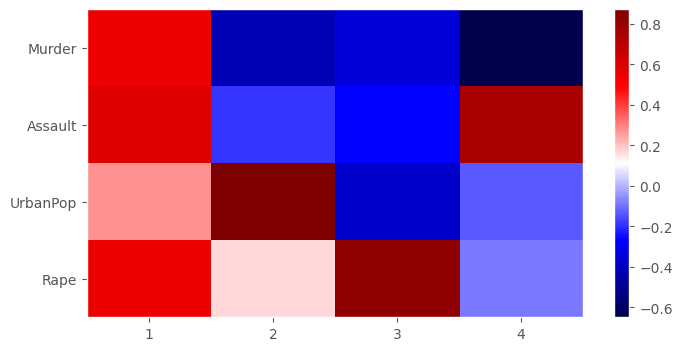

In [13]:
# =============================================================================
# VISUALIZACIÓN: Heatmap de componentes principales
# =============================================================================
# Un heatmap permite visualizar la magnitud y signo de los loadings
# Colores rojos: contribución positiva
# Colores azules: contribución negativa
# Permite identificar rápidamente qué variables pesan más en cada componente

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_

# Transponemos para tener variables en filas y componentes en columnas
plt.imshow(componentes.T, cmap='seismic', aspect='auto')

# Configuramos etiquetas de ejes
plt.yticks(range(len(datos.columns)), datos.columns)  # Variables en Y
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)  # PC en X
plt.grid(False)
plt.colorbar();  # Barra de colores para interpretar la escala

In [14]:
# =============================================================================
# VARIANZA EXPLICADA POR CADA COMPONENTE
# =============================================================================
# Este atributo muestra qué proporción de la varianza total explica cada componente
# PC1 explica 62% de la varianza total
# PC2 explica 24.7% de la varianza
# Juntas PC1 y PC2 explicarían 86.7% de la información original
modelo_pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


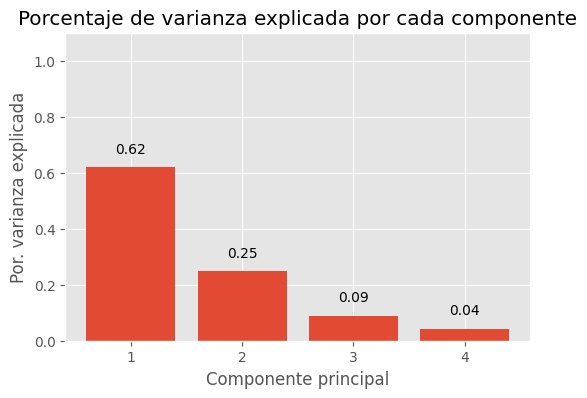

In [15]:
# =============================================================================
# GRÁFICO: Varianza explicada por cada componente
# =============================================================================
# Gráfico de barras que muestra visualmente la varianza explicada por cada PC
# Ayuda a decidir cuántas componentes conservar en la reducción dimensional

print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Creamos barras para cada componente
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

# Anotamos el porcentaje sobre cada barra
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)  # Redondeamos a 2 decimales
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),  # Posición del texto sobre la barra
        ha='center'
    )

# Configuración del gráfico
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)  # Límite superior para dejar espacio a las anotaciones
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [16]:
# =============================================================================
# VARIANZA EXPLICADA ACUMULADA
# =============================================================================
# Calcula la suma acumulativa de la varianza explicada
# Ejemplo: PC1+PC2 explican 86.7% de la varianza total
# Útil para determinar cuántas componentes son necesarias
modelo_pca.explained_variance_ratio_.cumsum()

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


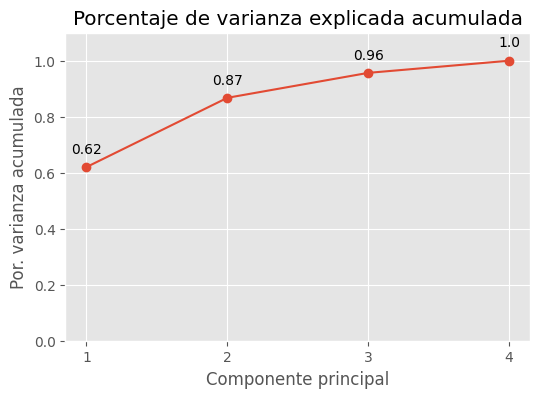

In [17]:
# =============================================================================
# GRÁFICO: Varianza explicada acumulada
# =============================================================================
# Gráfico de línea que muestra la varianza acumulada
# Ayuda a visualizar cuántas componentes necesitamos para alcanzar
# un umbral deseado (ej: 80%, 90%, 95% de varianza explicada)

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Gráfico de línea con marcadores
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'  # Marcadores circulares en cada punto
)

# Anotamos el porcentaje acumulado en cada punto
for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
# Configuración del gráfico
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [18]:
# =============================================================================
# PROYECCIÓN DE LOS DATOS EN EL ESPACIO DE COMPONENTES PRINCIPALES
# =============================================================================
# Ahora reducimos dimensionalidad: de 4 variables originales a 2 componentes
# Esto permite visualizar los datos en 2D conservando el 87% de la información

# Creamos un nuevo pipeline con solo 2 componentes
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
modelo_pca = pca_pipe['pca']

# fit_transform() entrena el modelo Y transforma los datos en un solo paso
proyecciones = pca_pipe.fit_transform(X=datos)

# Convertimos a DataFrame para facilitar interpretación
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2'],  # Ahora cada estado tiene 2 valores en vez de 4
    index   = datos.index  # Mantenemos los nombres de los estados
)
proyecciones.head()

,PC1,PC2
rownames,,
Alabama,0.985566,-1.133392
Alaska,1.950138,-1.073213
Arizona,1.763164,0.745957
Arkansas,-0.141420,-1.119797
California,2.523980,1.542934


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [19]:
# =============================================================================
# CÁLCULO MANUAL DE LAS PROYECCIONES
# =============================================================================
# Esta celda demuestra cómo se calculan las proyecciones matemáticamente
# Es el producto matricial de los componentes por los datos estandarizados

# scale() estandariza los datos (media=0, std=1)
# .T transpone la matriz
# np.dot() realiza la multiplicación matricial
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)

# Convertimos el resultado a DataFrame
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2
rownames,,
Alabama,0.985566,-1.133392
Alaska,1.950138,-1.073213
Arizona,1.763164,0.745957
Arkansas,-0.141420,-1.119797
California,2.523980,1.542934


Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [20]:
# =============================================================================
# RECONSTRUCCIÓN DE LOS DATOS ORIGINALES
# =============================================================================
# inverse_transform() revierte la transformación PCA
# IMPORTANTE: Como solo usamos 2 componentes (no las 4), la reconstrucción
# no será exacta, habrá una pequeña pérdida de información (13% de varianza)

reconstruccion = pca_pipe.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(
    reconstruccion,
    columns = datos.columns,
    index = datos.index
)

print('------------------')
print('Valores reconstruidos')
print('------------------')
display(reconstruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(datos.head())

# Al comparar ambas tablas, vemos diferencias debido a la pérdida del 13% de varianza
# Si hubiéramos usado 4 componentes, la reconstrucción sería perfecta

------------------
Valores reconstruidos
------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,12.108907,235.755815,55.293753,24.439738
Alaska,14.229193,281.230658,59.891444,29.393422
Arizona,10.517042,244.021633,81.897906,31.273586
Arkansas,9.480315,181.322623,50.971310,18.782131
California,10.838010,268.266387,94.898277,36.343663


---------------------
Valores originales
---------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
